In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import joblib
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
file_path = 'improved_traffic_prediction_dataset.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,Cell ID,Timestamp,User Throughput (Mbps),Cell Throughput (Mbps),Latency (ms),Uplink Resource Block Utilization (%),Downlink Resource Block Utilization (%),Radio Bearers Traffic (GB),Downlink Traffic Volume (GB),Uplink Traffic Volume (GB),...,Packet Loss Rate (%),Number of Active Users,Geographic Location,Day of Week,Time of Day,Weather Condition,Network Type (4G/5G),Handover Rate (%),Equipment Load Factor,Predicted Traffic Load (GB)
0,13579C,2024-06-01 00:00:00,28.36,218.54,84.48,42.92,67.94,179.69,437.08,109.270,...,2.71,406,"37.7749, -122.4194",Saturday,00:00,Cloudy,5G,5.25,0.34,546.350
1,24680D,2024-06-01 01:00:00,26.56,477.82,78.81,84.21,61.10,62.79,955.64,238.910,...,4.16,946,"37.7749, -122.4194",Saturday,01:00,Sunny,5G,5.44,0.59,1194.550
2,67890B,2024-06-01 02:00:00,6.15,379.40,61.62,99.78,43.05,108.21,758.80,189.700,...,0.63,194,"37.7749, -122.4194",Saturday,02:00,Cloudy,5G,3.92,0.19,948.500
3,24680D,2024-06-01 03:00:00,20.36,319.40,96.04,22.40,20.52,173.00,638.80,159.700,...,0.65,563,"28.7041, 77.1025",Saturday,03:00,Cloudy,4G,3.10,0.89,798.500
4,24680D,2024-06-01 04:00:00,22.11,120.21,28.04,91.79,59.70,127.56,240.42,60.105,...,2.78,345,"51.5074, -0.1278",Saturday,04:00,Snowy,5G,2.52,0.81,300.525


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Cell ID                                  1000 non-null   object 
 1   Timestamp                                1000 non-null   object 
 2   User Throughput (Mbps)                   1000 non-null   float64
 3   Cell Throughput (Mbps)                   1000 non-null   float64
 4   Latency (ms)                             1000 non-null   float64
 5   Uplink Resource Block Utilization (%)    1000 non-null   float64
 6   Downlink Resource Block Utilization (%)  1000 non-null   float64
 7   Radio Bearers Traffic (GB)               1000 non-null   float64
 8   Downlink Traffic Volume (GB)             1000 non-null   float64
 9   Uplink Traffic Volume (GB)               1000 non-null   float64
 10  Signal Quality (SINR)                    1000 non

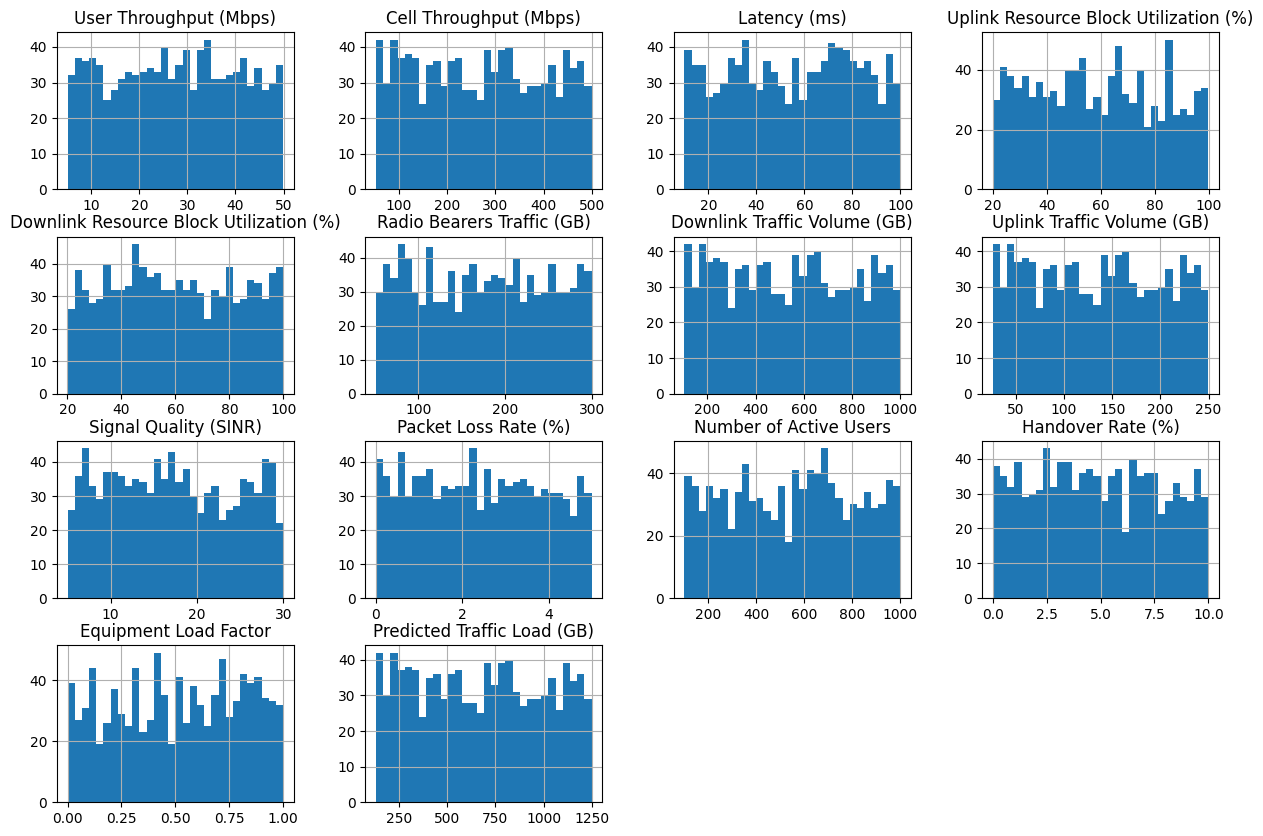

In [5]:
# Histograms
df.hist(figsize=(15, 10), bins=30)
plt.show()

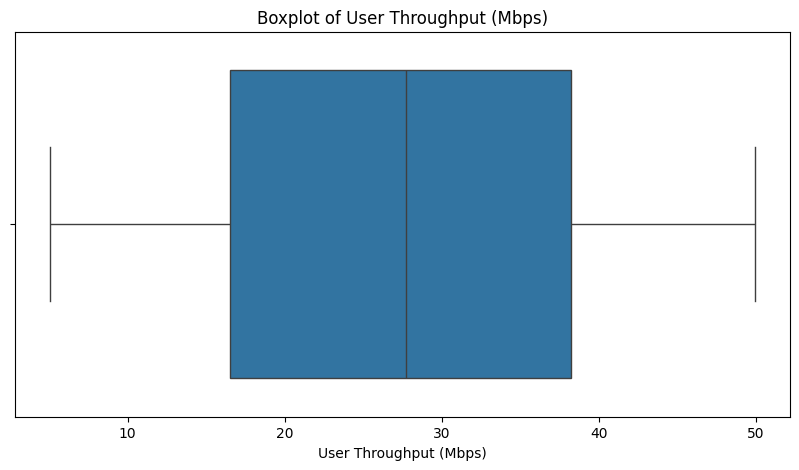

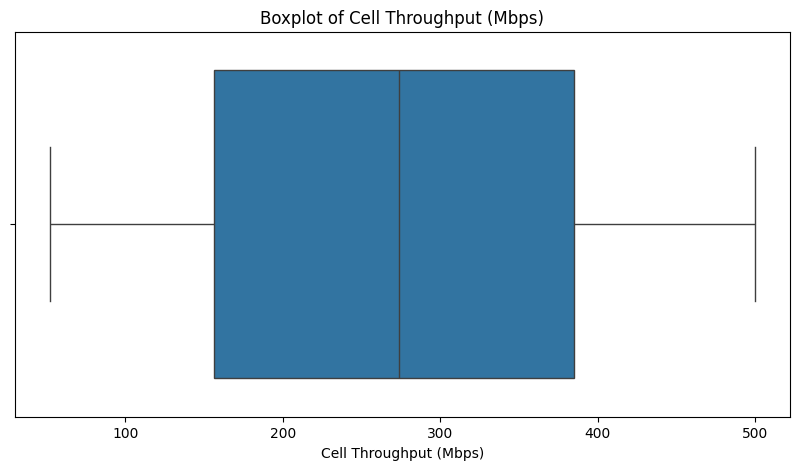

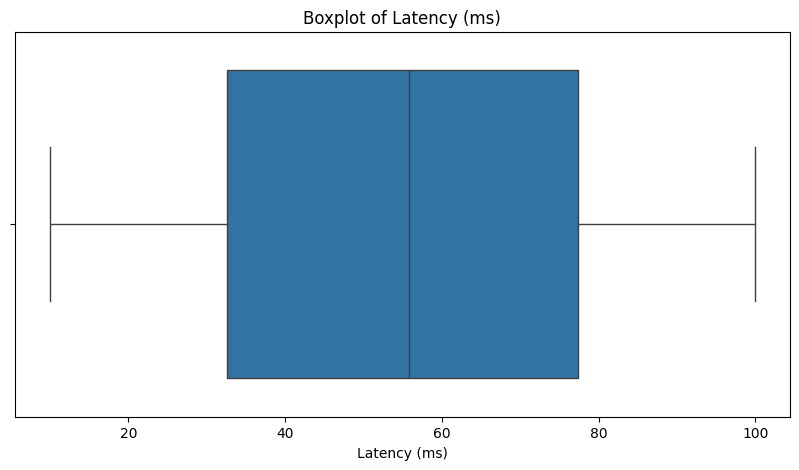

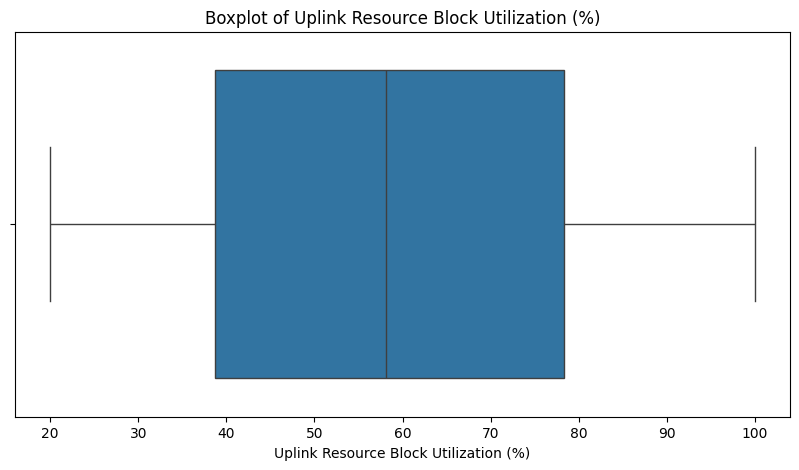

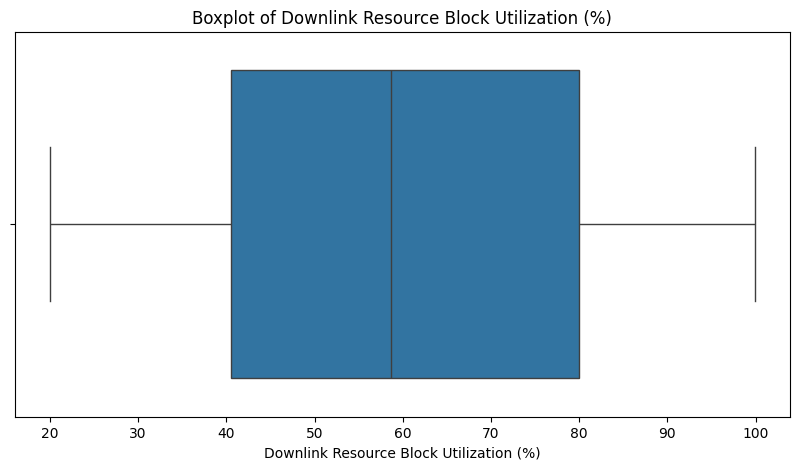

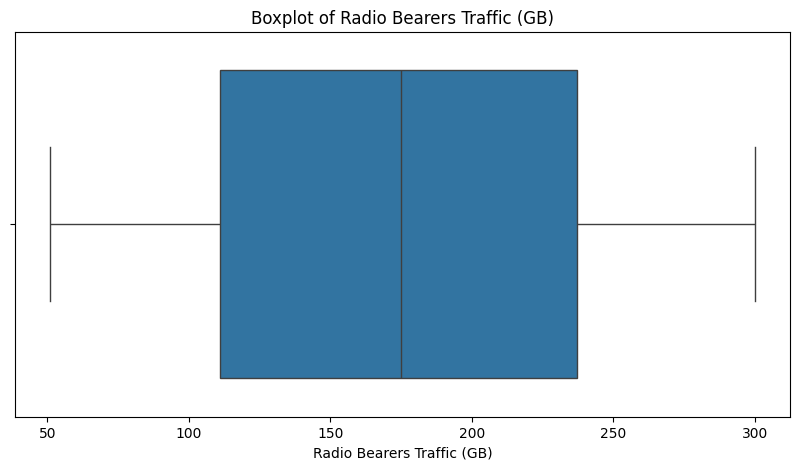

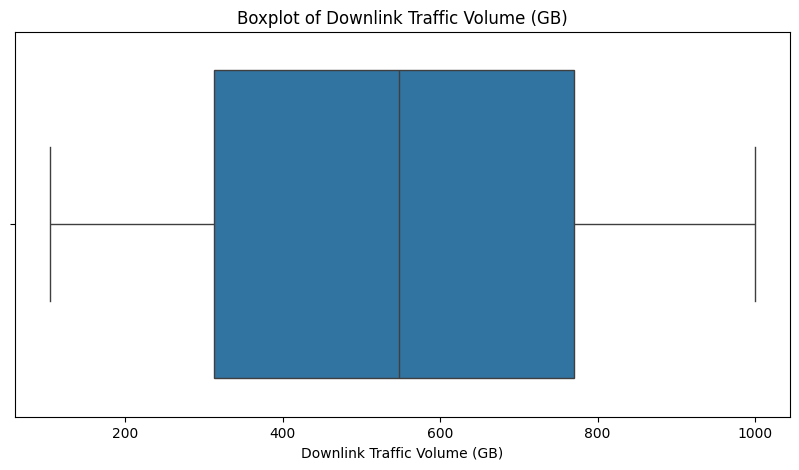

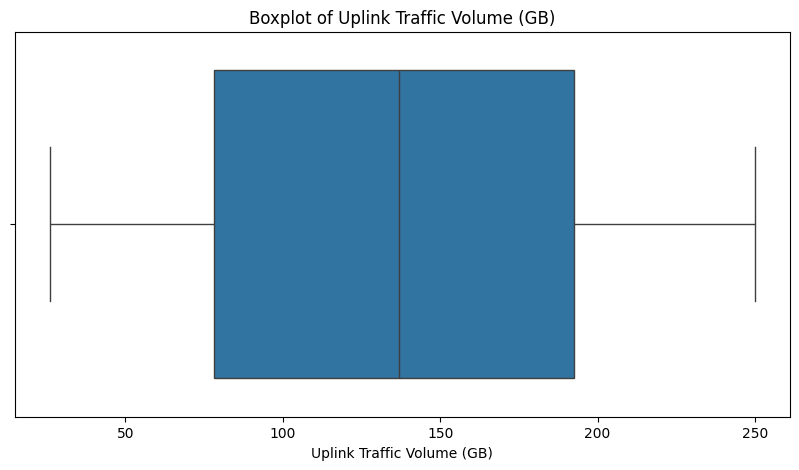

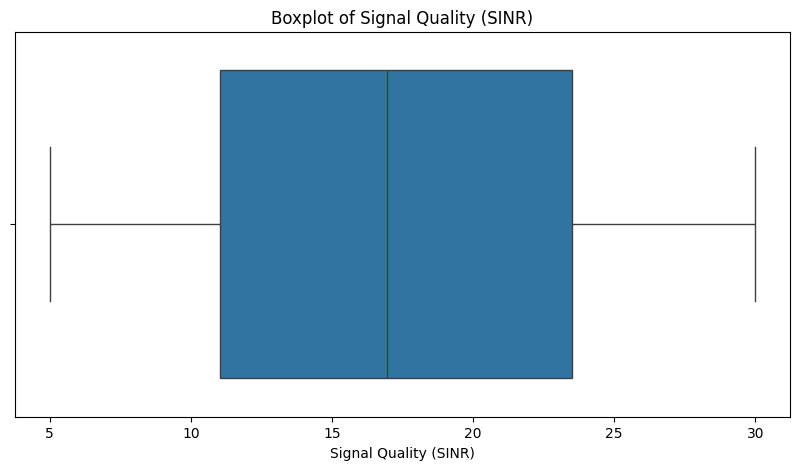

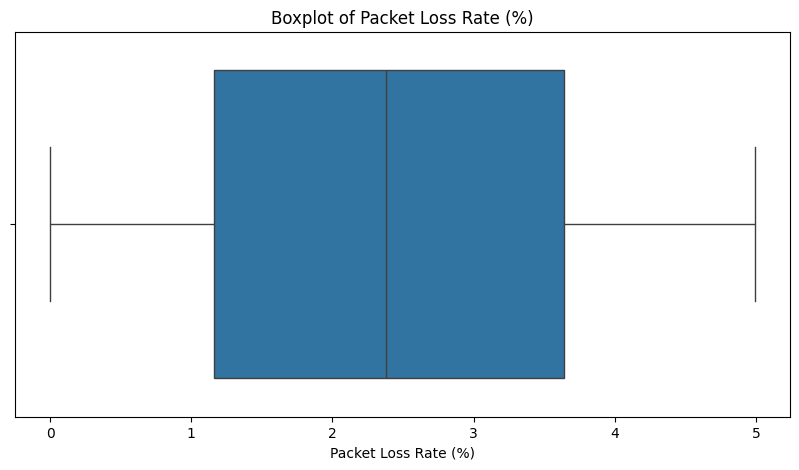

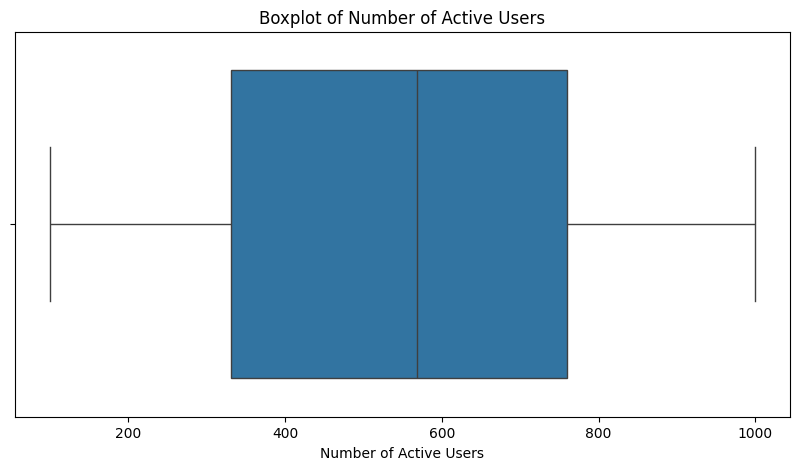

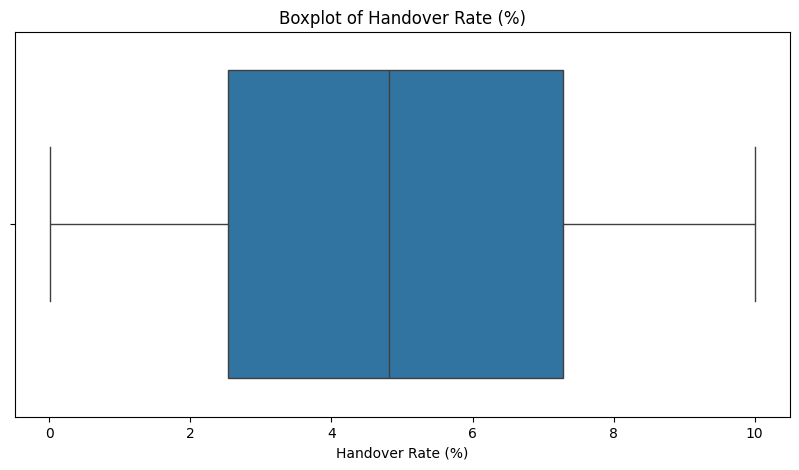

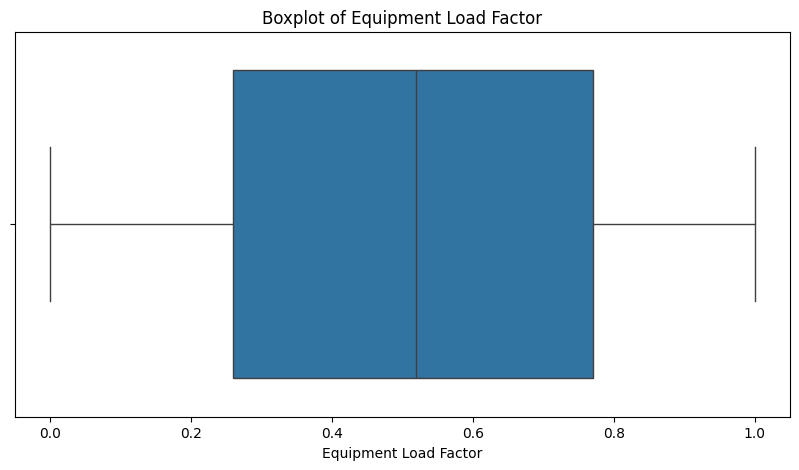

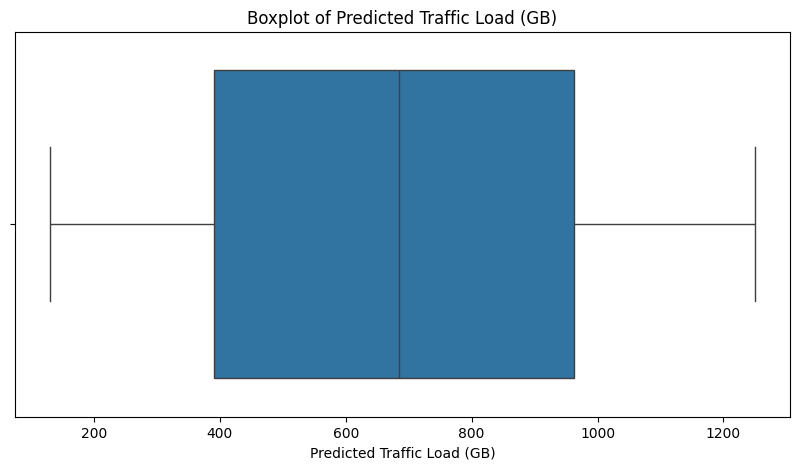

In [7]:
# Boxplots for each numerical column
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


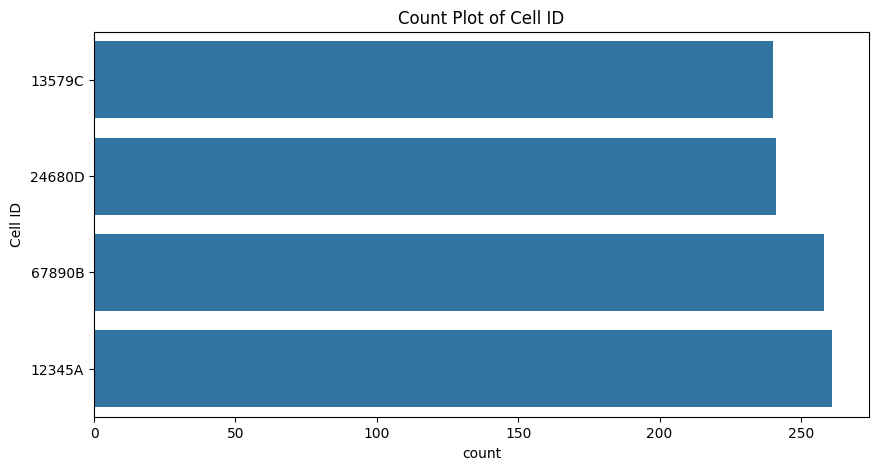

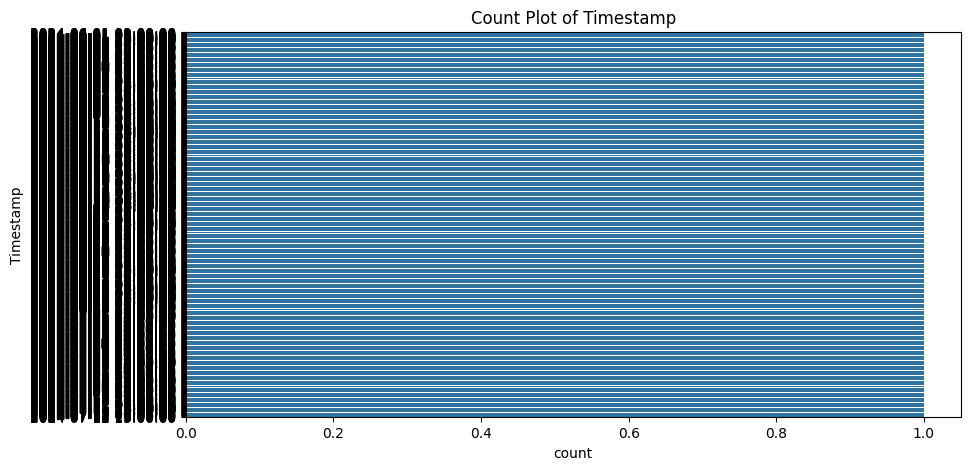

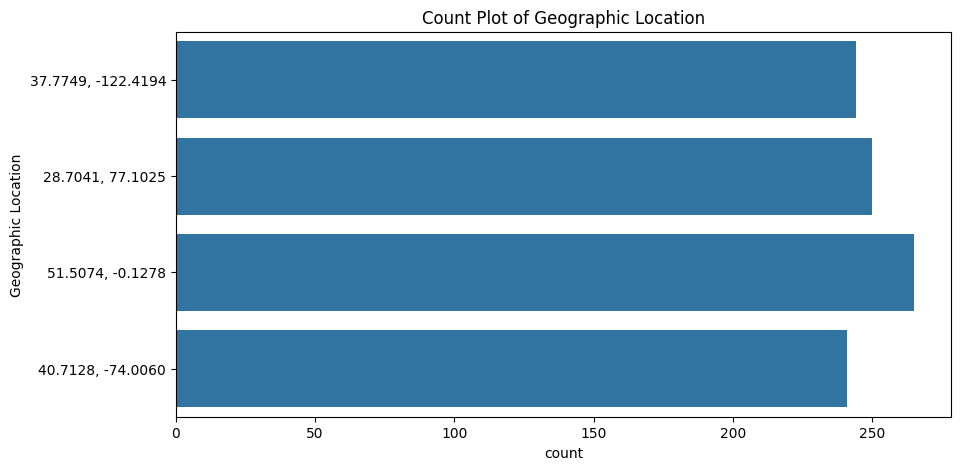

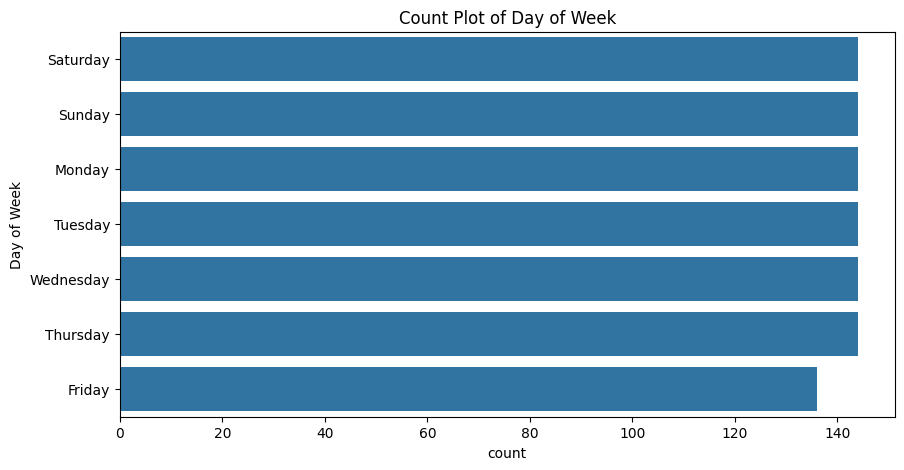

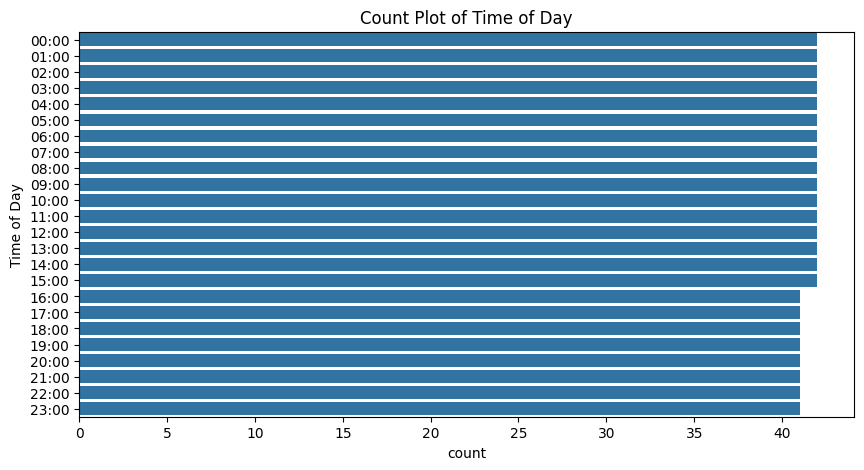

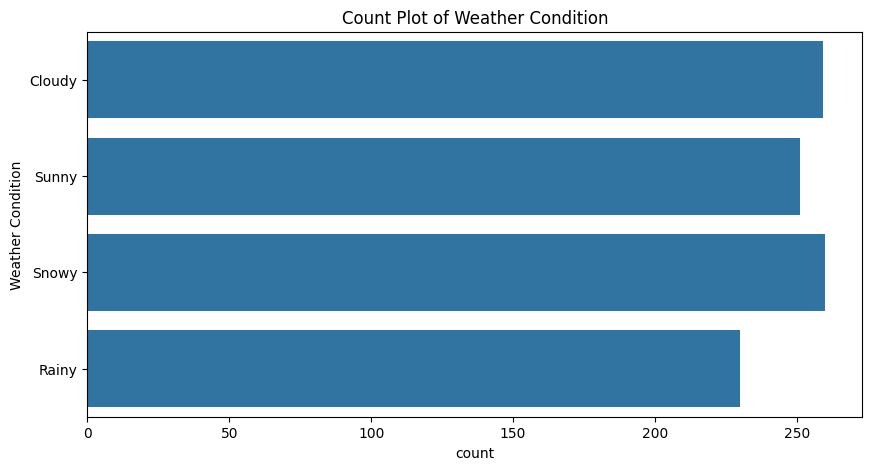

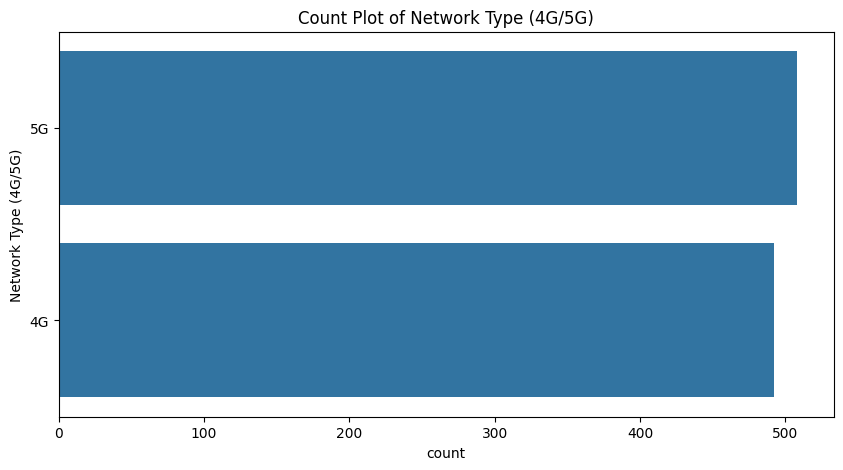

In [8]:
# Count plots for categorical columns
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col])
    plt.title(f'Count Plot of {col}')
    plt.show()


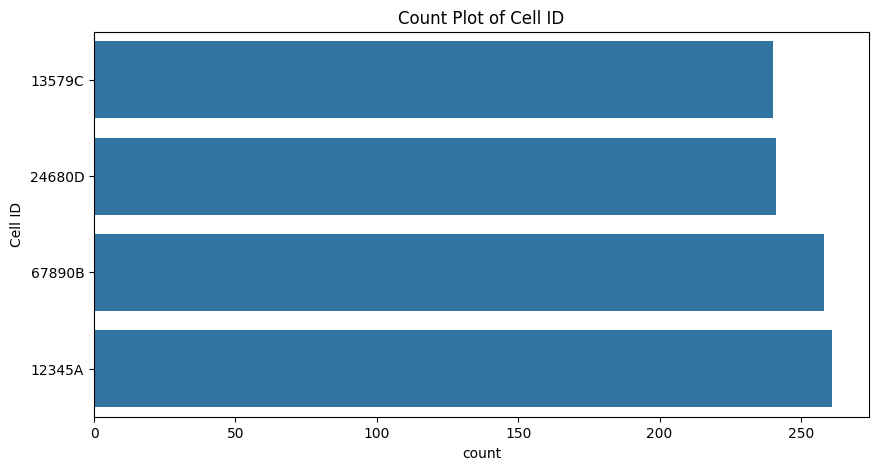

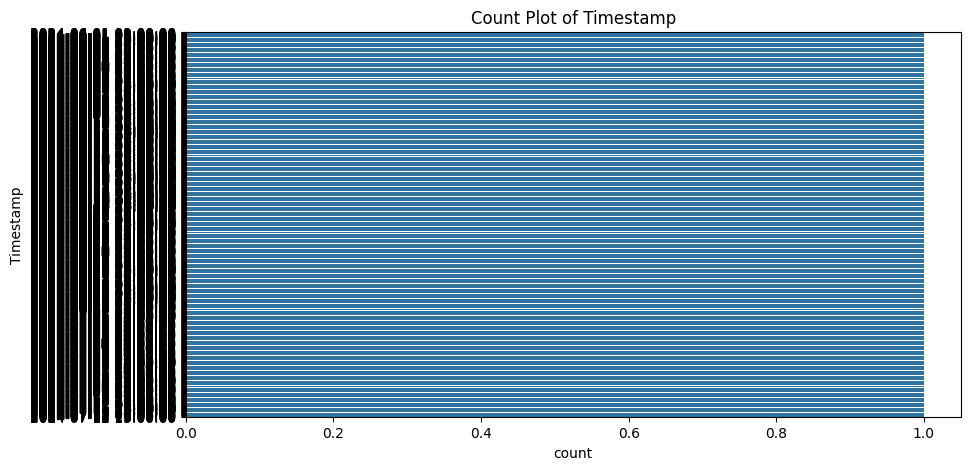

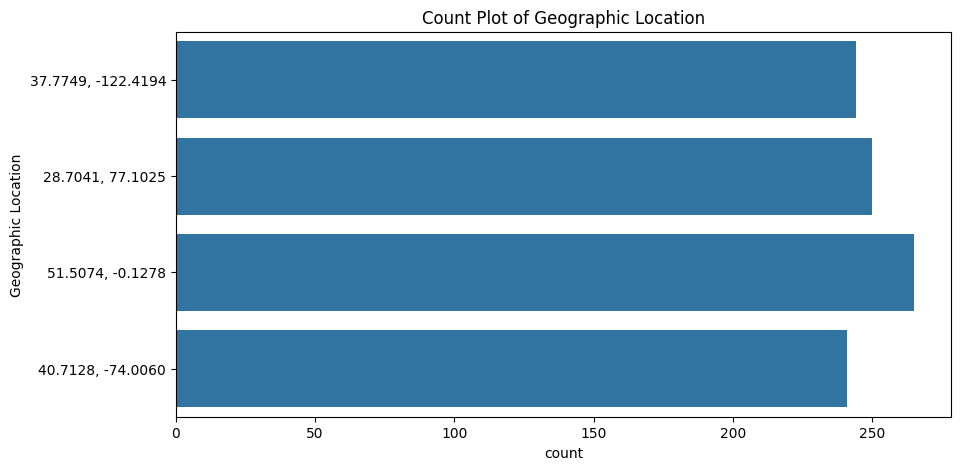

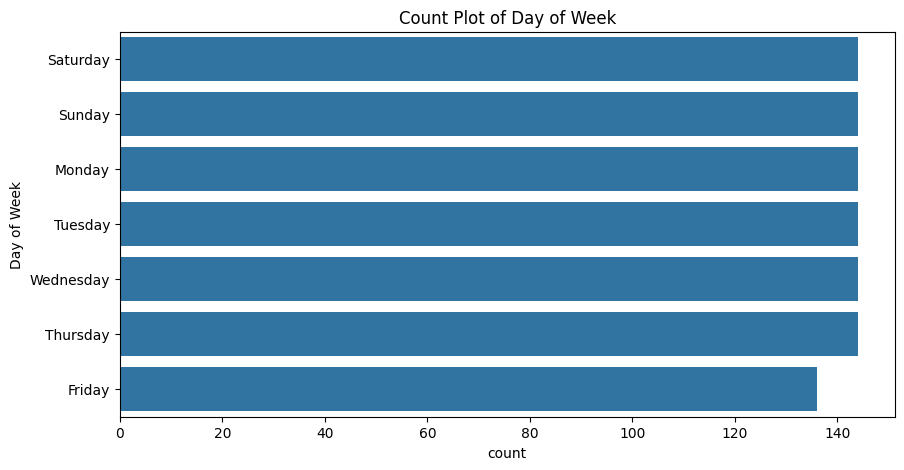

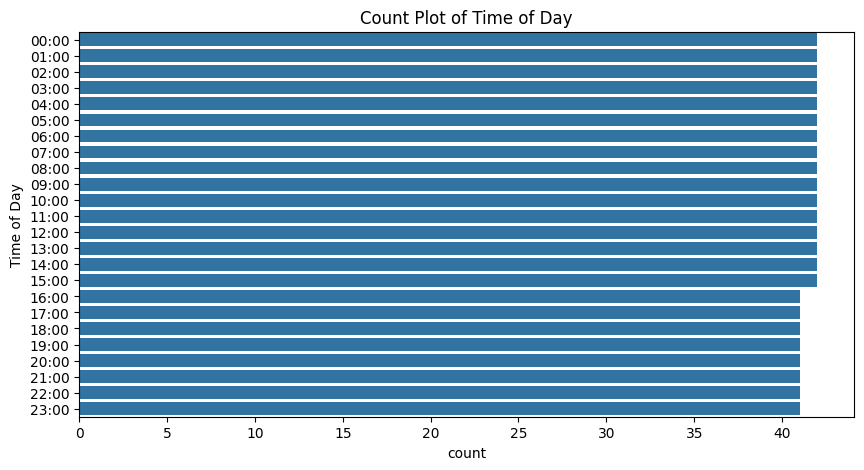

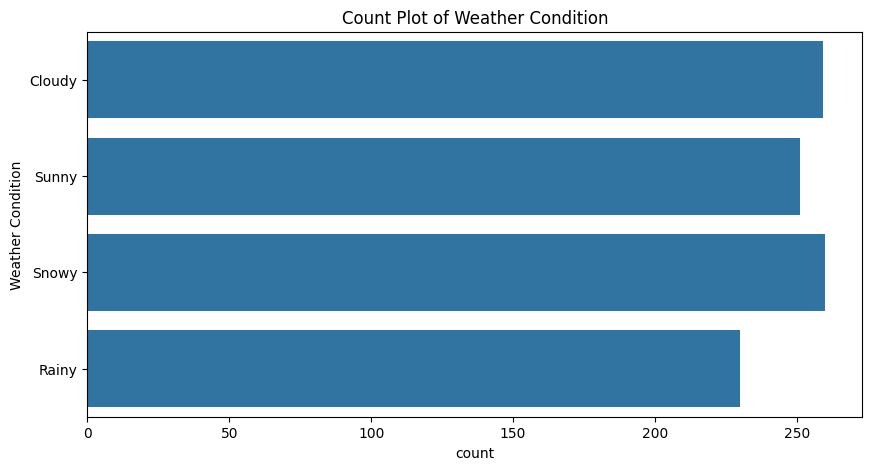

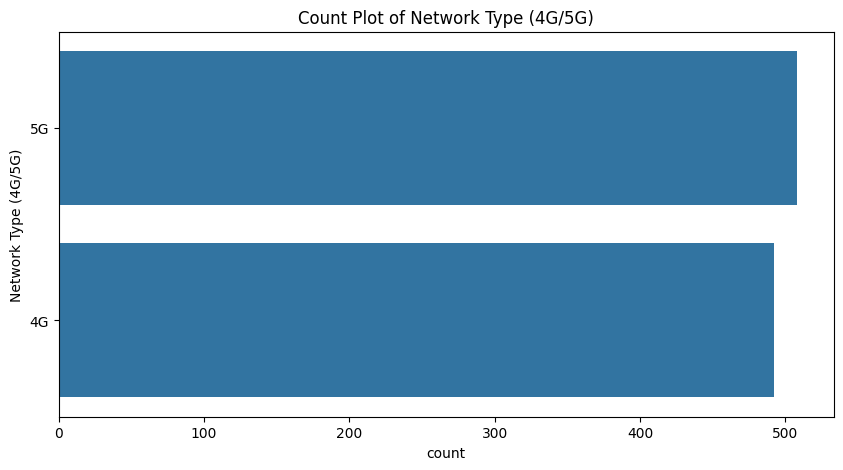

In [9]:
# Count plots for categorical columns
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col])
    plt.title(f'Count Plot of {col}')
    plt.show()


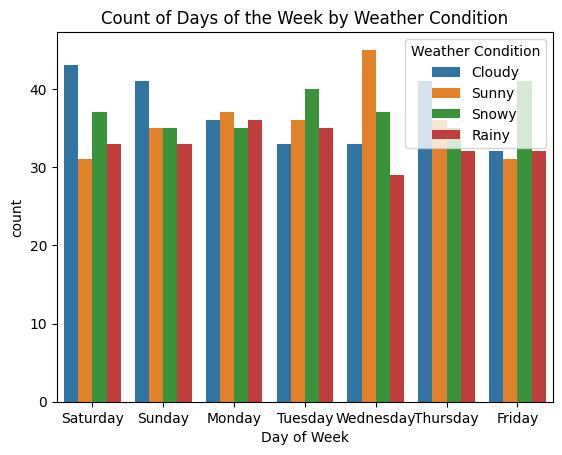

In [11]:
# Count plot of categorical variables
sns.countplot(data=df, x='Day of Week', hue='Weather Condition')
plt.title('Count of Days of the Week by Weather Condition')
plt.show()


In [6]:
# Missing values
print(df.isnull().sum())

# Anomalies in numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    print(f'{col} - Min: {df[col].min()}, Max: {df[col].max()}')


Cell ID                                    0
Timestamp                                  0
User Throughput (Mbps)                     0
Cell Throughput (Mbps)                     0
Latency (ms)                               0
Uplink Resource Block Utilization (%)      0
Downlink Resource Block Utilization (%)    0
Radio Bearers Traffic (GB)                 0
Downlink Traffic Volume (GB)               0
Uplink Traffic Volume (GB)                 0
Signal Quality (SINR)                      0
Packet Loss Rate (%)                       0
Number of Active Users                     0
Geographic Location                        0
Day of Week                                0
Time of Day                                0
Weather Condition                          0
Network Type (4G/5G)                       0
Handover Rate (%)                          0
Equipment Load Factor                      0
Predicted Traffic Load (GB)                0
dtype: int64
User Throughput (Mbps) - Min: 5.07, Max: 4

In [7]:
# Load the dataset
file_path = 'improved_traffic_prediction_dataset.csv'
df = pd.read_csv(file_path)

# Convert 'Timestamp' to datetime and extract useful features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df.drop(['Timestamp', 'Time of Day'], axis=1, inplace=True)


In [8]:
# Split 'Geographic Location' into 'Latitude' and 'Longitude'
df[['Latitude', 'Longitude']] = df['Geographic Location'].str.split(',', expand=True).astype(float)
df.drop(['Geographic Location'], axis=1, inplace=True)


In [9]:
# Encode categorical variables
categorical_features = ['Cell ID', 'Day of Week', 'Weather Condition', 'Network Type (4G/5G)']
label_encoders = {feature: LabelEncoder().fit(df[feature]) for feature in categorical_features}
for feature, le in label_encoders.items():
    df[feature] = le.transform(df[feature])



In [10]:

# Define the target variable and features
X = df.drop(['Predicted Traffic Load (GB)'], axis=1)
y = df['Predicted Traffic Load (GB)']

In [11]:
# Apply SelectKBest to extract top k features
k = 10  # number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]
selected_features

c:\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 2  7  8 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
c:\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Index(['User Throughput (Mbps)', 'Cell Throughput (Mbps)',
       'Radio Bearers Traffic (GB)', 'Downlink Traffic Volume (GB)',
       'Uplink Traffic Volume (GB)', 'Signal Quality (SINR)', 'Day of Week',
       'Network Type (4G/5G)', 'Month', 'Hour'],
      dtype='object')

In [12]:

# Select only the important features
X_selected = df[selected_features]


In [13]:
X_selected.to_csv('final.csv')

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 10), (200, 10), (800,), (200,))

In [16]:
# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
# Predict on the test set
y_pred = rf_model.predict(X_test)


In [18]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("R-sq: ",r2)

MSE : 0.8531116712499596
R-sq:  0.9999919102272595


In [19]:


def clean_column_names(df):
    df.columns = df.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)
    return df

# Clean the feature names
X_train = clean_column_names(X_train)
X_test = clean_column_names(X_test)

# Define your parameters for regression
params = {
    'objective': 'regression',  
    'metric': 'rmse',  
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

# Create your datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set the number of rounds
num_round = 100

# Train the model with early stopping
bst = lgb.train(params, 
                train_data, 
                num_round, 
                valid_sets=[test_data], 
                callbacks=[lgb.early_stopping(stopping_rounds=10)])

# Save the model
bst.save_model('regression_model.txt')

# Predict on test data
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

r2 = r2_score(y_test, y_pred)
print(r2)

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[90]	valid_0's rmse: 3.58782
RMSE: 3.5878150028948337
0.9998779351782722


In [20]:

# Create and train the SVM model
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 26491.254154491275
R-squared: 0.748792294207395


In [21]:

# Create a Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.0711342697708151e-26
R-squared: 1.0


In [22]:


# XGBoost regressor model initialization
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Training the model
xg_reg.fit(X_train,y_train)

# Making predictions
y_pred = xg_reg.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 21491.576951469466
R-squared: 0.7962025614808969


In [23]:

# Defining base regressors
base_models = [
    ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
    ('dt', DecisionTreeRegressor(random_state=42))
]

# Meta-regressor (final estimator)
meta_model = LinearRegression()

# Stacking regressor model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Training the stacking regressor
stacking_model.fit(X_train, y_train)

# Making predictions
y_pred = stacking_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 1.2576764058778371
R-squared: 0.9999880738751473


In [24]:

# Save the model to disk
filename = 'stacking_model.joblib'
joblib.dump(stacking_model, filename)

['stacking_model.joblib']

In [25]:

# Save the model to disk
filename = 'linear.joblib'
joblib.dump(lr_model, filename)

['linear.joblib']

In [26]:
import joblib
import numpy as np

# Load the saved models
rf_model = joblib.load('linear.joblib')


# Define the input data (make sure it follows the same order and preprocessing as the training data)
# Example input: [User Throughput, Cell Throughput, Radio Bearers Traffic, Downlink Traffic Volume, Uplink Traffic Volume, Signal Quality, Day of Week, Network Type, Month, Hour]
input_data = np.array([[30.5, 250.0, 180.0, 450.0, 110.0, 15.0, 3, 1, 7, 14]])

# Make predictions using the loaded models
rf_prediction = rf_model.predict(input_data)


# Display the predictions
print(f"Random Forest Prediction: {rf_prediction[0]}")



Random Forest Prediction: 573.8095238095237


c:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
